#                                                           HEART DISEASE PREDICTION

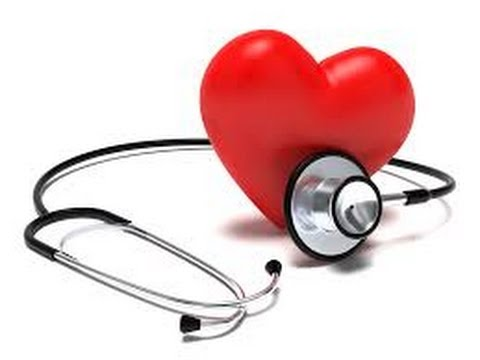

Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

Attribute Information:

- age: age in years

- sex: sex (1 = male; 0 = female)

- cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic 

- trestbps: resting blood pressure (in mm Hg on admission to the hospital)

- chol: serum cholestoral in mg/dl

- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 20 ekgmo

- thalach: maximum heart rate achieved

- exang: exercise induced angina (1 = yes; 0 = no)

- oldpeak = ST depression induced by exercise relative to rest

- slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

- ca: number of major vessels (0-3) colored by flourosopy

- thal: thalassemia-- 3 = normal; 6 = fixed defect; 7 = reversable defect

- target: 0(no presence) 1(presence)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import cm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
heart_data = pd.read_csv('heart.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print('Number of Rows:', heart_data.shape[0])
print('Number of Features:', heart_data.shape[1])

Number of Rows: 303
Number of Features: 14


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart_data['target'].unique()

array([1, 0], dtype=int64)

In [8]:
heart_data.columns = ['Age', 'Sex',  'Chest_pain_type', 'Resting_blood_pressure', 'Serum_cholestoral(mg/dl)', 'Fasting_blood_sugar(mg/dl)', 'Resting_ECG_results', 'Max_heart_rate'
                    , 'Exercise_induced_angina', 'Oldpeak', 'Slope', 'No.of_major_vessels', 'thalassemia','target']

In [9]:
data_sample = heart_data.copy()

In [10]:
data_sample['Sex'][data_sample['Sex']==1]='Male' 
data_sample['Sex'][data_sample['Sex']==0]='Female'

data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 1] = 'typical angina' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 2] = 'atypical angina' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 3] = 'non-anginal pain' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 4] = 'asymptomatic'

data_sample['Fasting_blood_sugar(mg/dl)'][data_sample['Fasting_blood_sugar(mg/dl)'] == 0] = 'lower than 120mg/ml' 
data_sample['Fasting_blood_sugar(mg/dl)'][data_sample['Fasting_blood_sugar(mg/dl)'] == 1] = 'greater than 120mg/ml'

data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 0] = 'normal' 
data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 1] = 'ST-T wave abnormality' 
data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 2] = 'left ventricular hypertrophy'

data_sample['Exercise_induced_angina'][data_sample['Exercise_induced_angina'] == 0] = 'no' 
data_sample['Exercise_induced_angina'][data_sample['Exercise_induced_angina'] == 1] = 'yes'

data_sample['Slope'][data_sample['Slope'] == 1] = 'upsloping' 
data_sample['Slope'][data_sample['Slope'] == 2] = 'flat' 
data_sample['Slope'][data_sample['Slope'] == 3] = 'downsloping'

data_sample['thalassemia'][data_sample['thalassemia'] == 1] = 'normal' 
data_sample['thalassemia'][data_sample['thalassemia'] == 2] = 'fixed defect' 
data_sample['thalassemia'][data_sample['thalassemia'] == 3] = 'reversable defect'

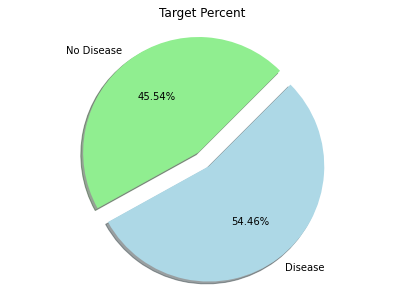

In [11]:
def plot1():
  plt.figure(figsize=(7, 5))
  target_count = [len(data_sample[data_sample['target'] == 0]),len(data_sample[data_sample['target'] == 1])]
  labels = ['No Disease', 'Disease']
  colors = ['lightgreen', 'lightblue']
  explode = (0.05, 0.1)
  plt.pie(target_count, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=45)
  plt.title('Target Percent')
  plt.axis('equal')
  plt.show()  
plot1()

We have almost equaly distributed target. No class imbalance issue.

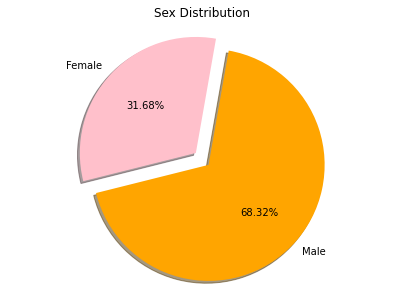

In [12]:
def plot2():
  plt.figure(figsize=(7, 5))
  sex_count = [len(data_sample[data_sample['Sex'] == 'Female']),len(data_sample[data_sample['Sex'] == 'Male'])]
  labels = ['Female', 'Male']
  colors = ['pink', 'orange']
  explode = (0.05, 0.1)
  plt.pie(sex_count, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=80)
  plt.title('Sex Distribution')
  plt.axis('equal')
  plt.show()
  
plot2()

Male Population is higher Therefore Males are more likely to turn up diagnosis.

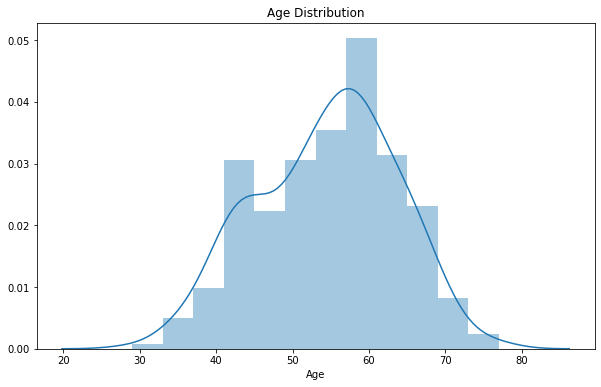

In [13]:
def plot3():
    plt.figure(figsize=(10,6))
    sns.distplot(data_sample['Age'])
    plt.title('Age Distribution')
    plt.show()
plot3()   

Age seems to be somewhat normally distributed.

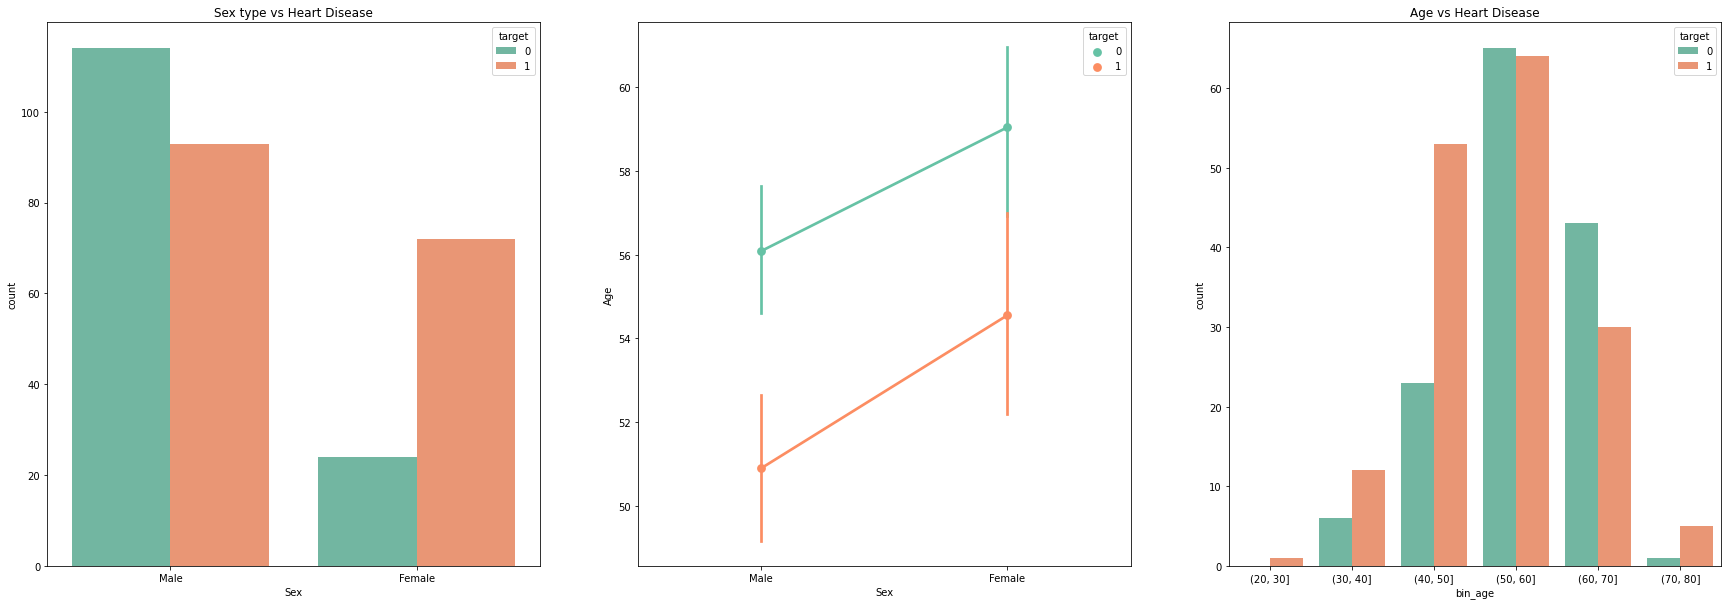

In [14]:
def plot4():
 
    plt.figure(figsize=(30,10))
  
    age_bins = [20,30,40,50,60,70,80]
    data_sample['bin_age'] = pd.cut(data_sample['Age'], bins=age_bins)
  
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Sex', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Sex type vs Heart Disease')
    
    plt.subplot(1,3,2)
    p2 = sns.pointplot(x='Sex', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Sex type vs Heart Disease')
        
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='bin_age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs Heart Disease')
    
plot4()

Insights:

Figure1 shows that Male are more likely to get heart disease

Figure 2 shows that mean age for female with heart disease is 54 and male with heart disease is 51

Figure 3 shows Ages between 40 to 70 are more likely to have heart disease



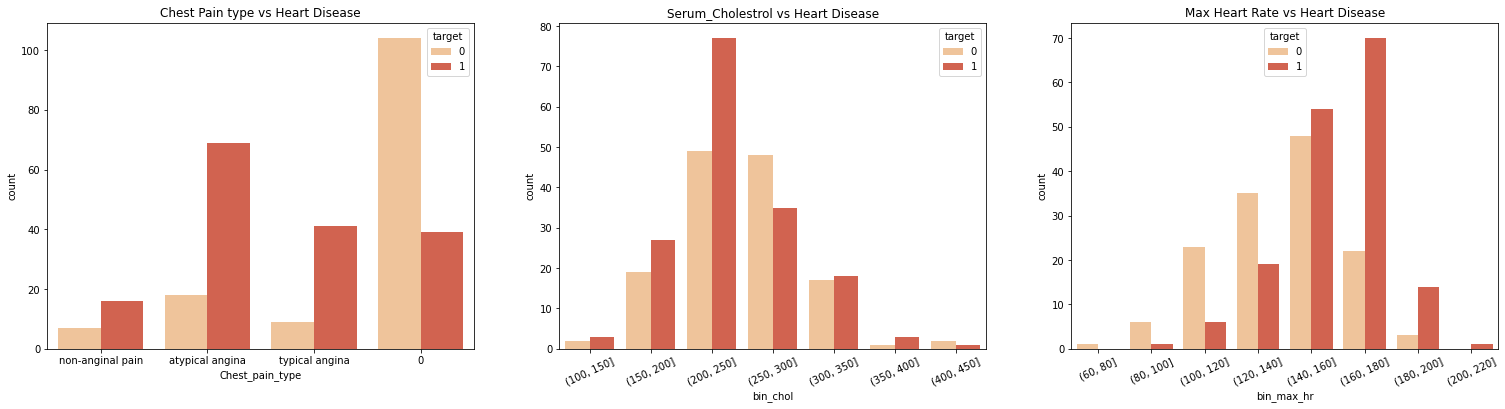

In [15]:
def plot5():
  
    plt.figure(figsize=(26,6))
    chol_bins = [100,150,200,250,300,350,400,450]
    max_hr_bins = [60,80,100,120,140,160,180,200,220]
    
    data_sample['bin_chol'] = pd.cut(data_sample['Serum_cholestoral(mg/dl)'], bins=chol_bins)
    data_sample['bin_max_hr'] = pd.cut(data_sample['Max_heart_rate'], bins=max_hr_bins)
    
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Chest_pain_type', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Chest Pain type vs Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='bin_chol', data=data_sample, hue='target', palette='OrRd')
    plt.tick_params(axis='x',labelrotation = 25)
    p2.set_title('Serum_Cholestrol vs Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='bin_max_hr', data=data_sample, hue='target', palette='OrRd')
    plt.tick_params(axis='x',labelrotation = 25)
    p3.set_title('Max Heart Rate vs Heart Disease')
    
plot5()

Insights:

Figure 1 : Shows atypical angina chest pain resulted in more heart disease

Figure 2 : ShowsCholestrol Range of 200 - 300 have resulted in heart disease

Figure 3 : Shows Max Heart rate between 140 to 180 have resulted in heart disease

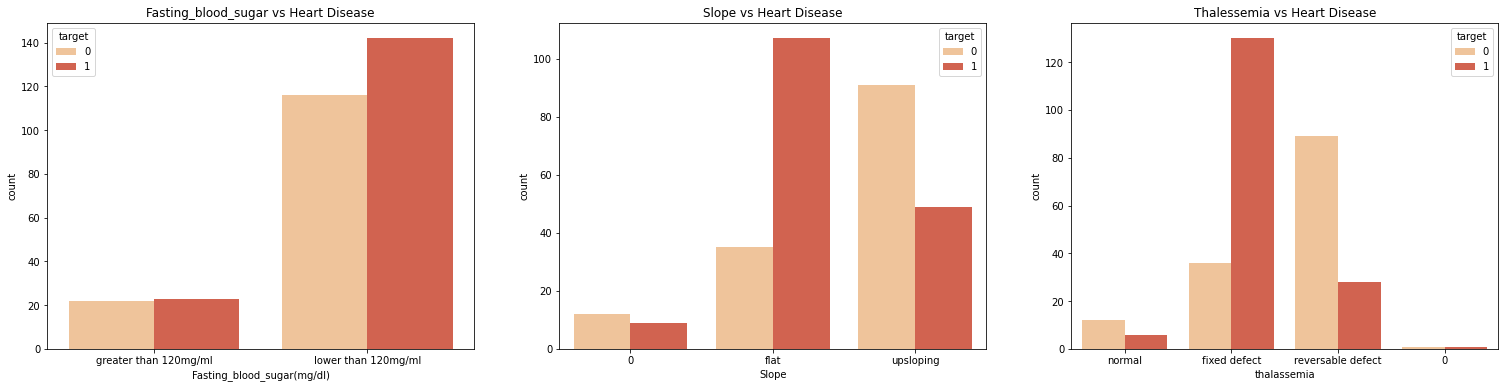

In [16]:
def plot6():
    plt.figure(figsize=(26,6))
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Fasting_blood_sugar(mg/dl)', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='Slope', data=data_sample, hue='target', palette='OrRd')
    p2.set_title('Slope vs Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='thalassemia', data=data_sample, hue='target', palette='OrRd')
    p3.set_title('Thalessemia vs Heart Disease')
plot6()

Insights:

Figure 1 : Shows Blood Sugar level lower than 120mg/ml has resulted in more heart disease

Figure 2 : Shows Slope type of flat have resulted in heart disease

Figure 3 : Shows thalassemai type of fixed defect have resulted in heart disease

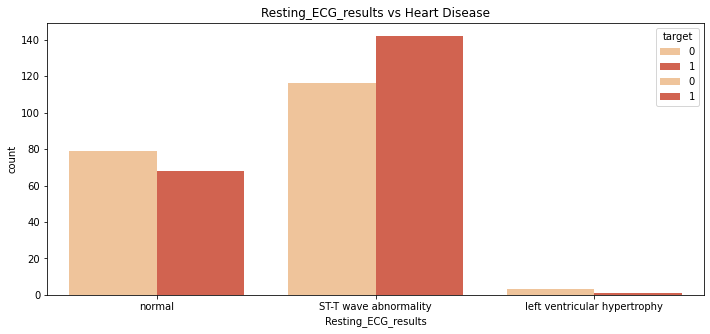

In [17]:
def plot7():
    plt.figure(figsize=(40,5))
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Fasting_blood_sugar(mg/dl)', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')
         
  
    p1 = sns.countplot(x='Resting_ECG_results', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Resting_ECG_results vs Heart Disease')
    
plot7()

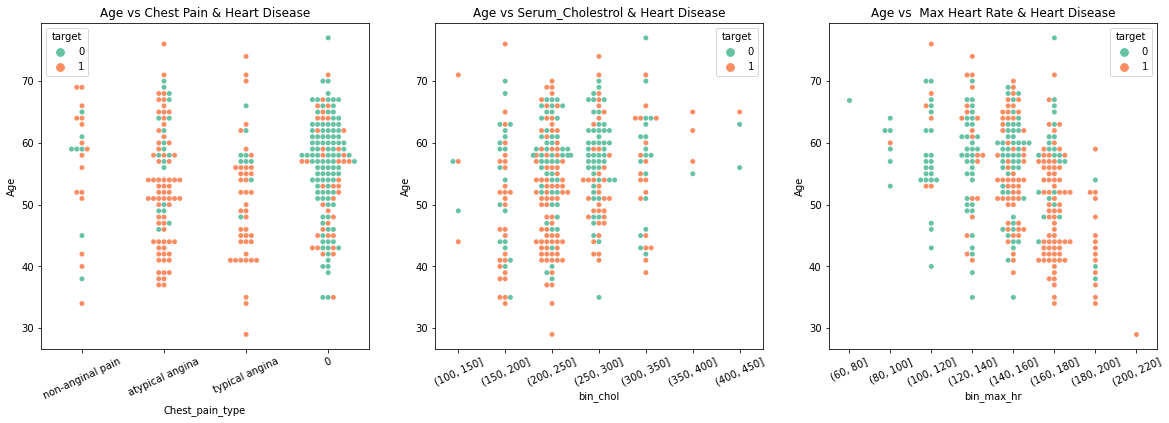

In [18]:
def plot8():
    plt.figure(figsize=(20,6))
    
    plt.subplot(1,3,1)
    p1 = sns.swarmplot(x='Chest_pain_type', y='Age', data=data_sample, hue='target', palette='Set2')
    plt.tick_params(axis='x',labelrotation = 25)
    p1.set_title('Age vs Chest Pain & Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.swarmplot(x='bin_chol', y='Age', data=data_sample, hue='target', palette='Set2')
    plt.tick_params(axis='x',labelrotation = 25)
    p2.set_title('Age vs Serum_Cholestrol & Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.swarmplot(x='bin_max_hr',y='Age', data=data_sample, hue='target', palette='Set2')
    plt.tick_params(axis='x',labelrotation = 25)
    p3.set_title('Age vs  Max Heart Rate & Heart Disease')
plot8()

Insights:

Figure 1 : Important note here - Chest pain type makes an important factor for having heart disesese because most of the cases with target 1 have chest pain

Figure 2 : Cholestrol level 200-250 is more among the age range 40 - 60

Figure 3 : Max heart rate between 160-180 that have led to heart disease are more likely to occur for age group of 40-50



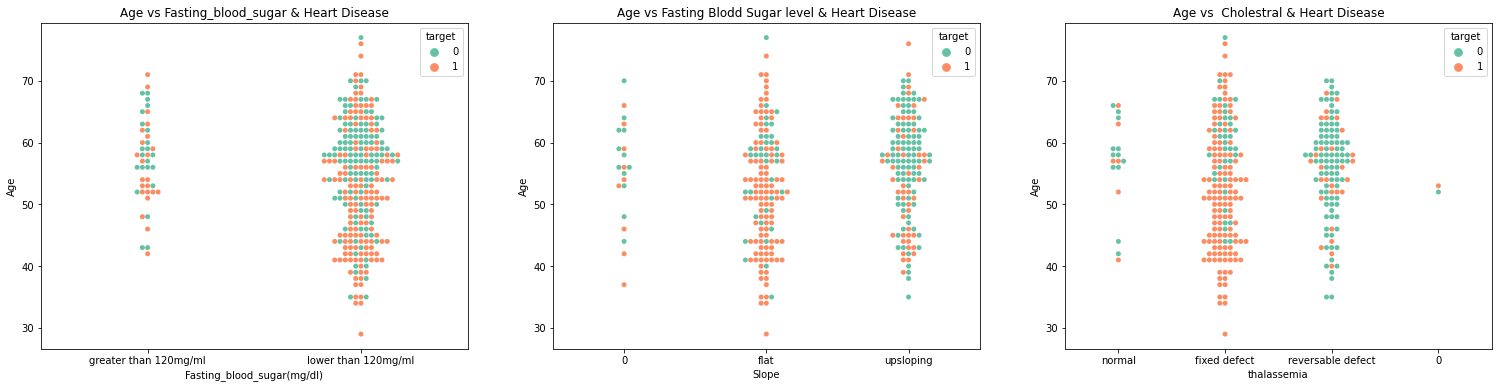

In [19]:
def plot9():
    plt.figure(figsize=(26,6))
    
    plt.subplot(1,3,1)
    p1 = sns.swarmplot(x='Fasting_blood_sugar(mg/dl)', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Age vs Fasting_blood_sugar & Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.swarmplot(x='Slope', y='Age', data=data_sample, hue='target', palette='Set2')
    p2.set_title('Age vs Fasting Blodd Sugar level & Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.swarmplot(x='thalassemia',y='Age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs  Cholestral & Heart Disease')
plot9()

Insights:

Figure 1 : Important note here - Most of our observation shows Blood sugar level lower than 120mg/ml

Figure 2 : Distribution of slope type with ages

Figure 3 : Important note here - Thalassemia type of fixed defect that have led to heart disease are more likely to occur for age group of 40-55

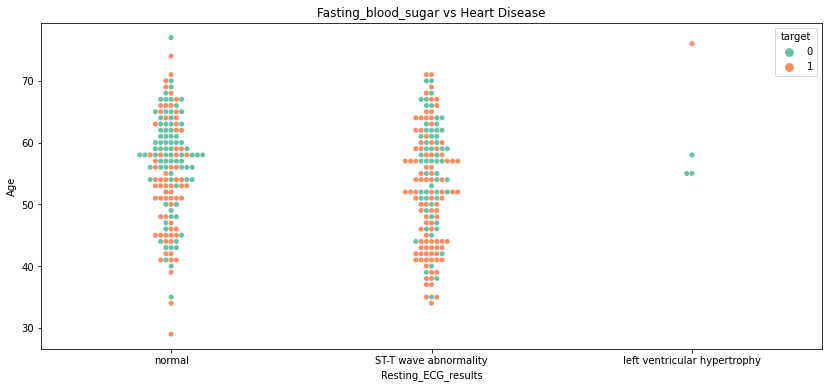

In [20]:
def plot10():
    plt.figure(figsize=(14,6))
    p1 = sns.swarmplot(x='Resting_ECG_results', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')           
plot10()

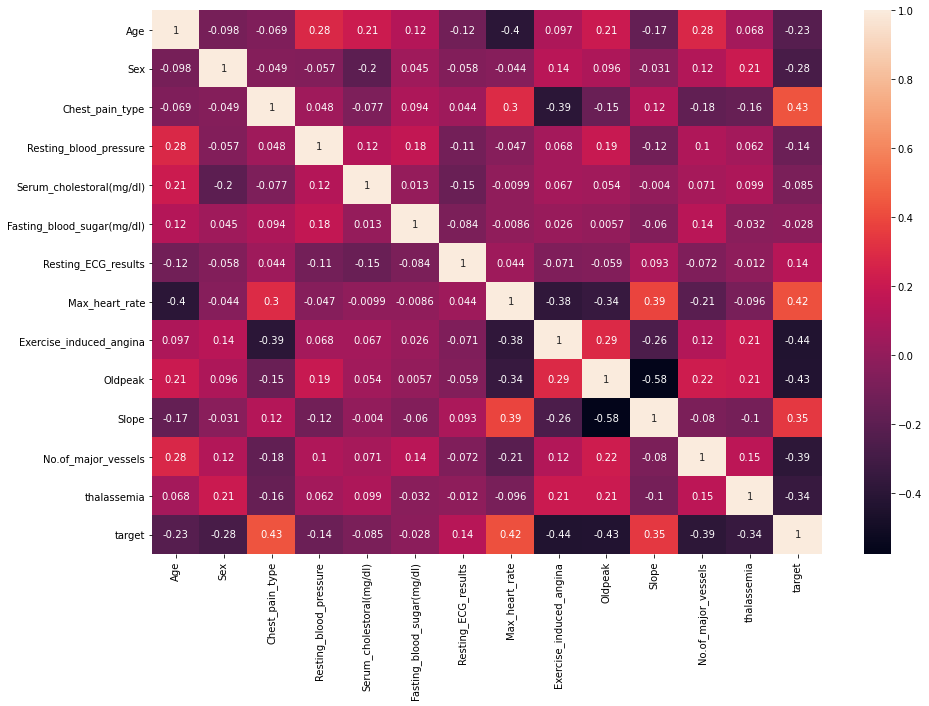

In [21]:
plt.figure(figsize=(15,10))
p=sns.heatmap(heart_data.corr(), annot=True) 

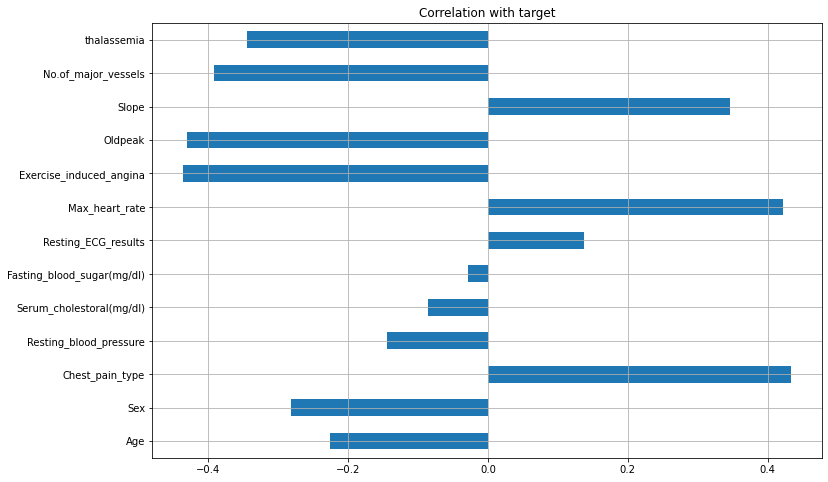

In [22]:
heart_data.drop('target', axis=1).corrwith(heart_data.target).plot(kind='barh', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

Insights:

1: In correlation matrix and graph we see that Slope,Max_heart_rate and Chest_pain_type are positivile correleated with target
   variable

2:  Age, Sex, Exercise_induced_angina, Oldpeak, No.of_major_vessels, thalassemia, Resting_blood_pressure are neatively 
    correleated with target variable
    
3:  And the remainig Fasting_blood_sugar(mg/dl),Resting_ECG_results,Serum_cholestoral(mg/dl) are not very important variables
      because it is very less nearby zero correlation with target variable


# Skewness

In [23]:
heart_data.skew(axis=0)

Age                          -0.202463
Sex                          -0.791335
Chest_pain_type               0.484732
Resting_blood_pressure        0.713768
Serum_cholestoral(mg/dl)      1.143401
Fasting_blood_sugar(mg/dl)    1.986652
Resting_ECG_results           0.162522
Max_heart_rate               -0.537410
Exercise_induced_angina       0.742532
Oldpeak                       1.269720
Slope                        -0.508316
No.of_major_vessels           1.310422
thalassemia                  -0.476722
target                       -0.179821
dtype: float64

In [24]:
# Treating the skewness in the dataset
for index in heart_data.skew().index:
    if heart_data.skew().loc[index]>0.55:
        heart_data[index]=np.log1p(heart_data[index])

# Checking Outliers 

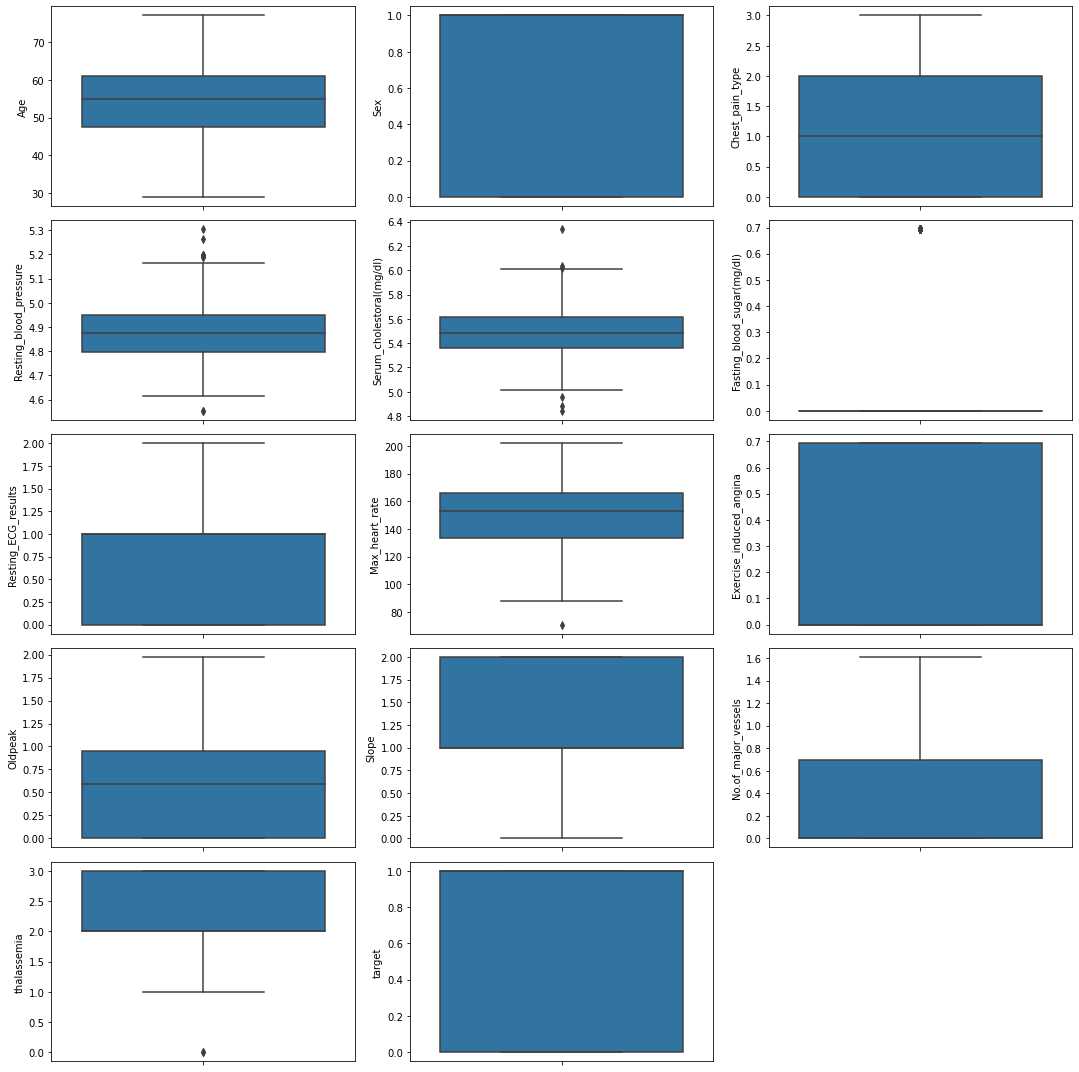

In [25]:
fig = plt.figure(figsize=(15,15))
for i in range(len(heart_data.columns)):
    fig.add_subplot(5,3,i+1)
    sns.boxplot(y=heart_data.iloc[:,i])

plt.tight_layout()
plt.show()

We clearly see that in the variables - Resting_blood_pressure, Serum_cholestoral(mg/dl), Fasting_blood_sugar(mg/dl),Max_heart_rate and thalassemia some small amount of outliers is present 

In [26]:
# Remove Outliers
from scipy.stats import zscore
z_score=abs(zscore(heart_data))
print("The shape of dataset before removing outliers",heart_data.shape)
heart_data=heart_data.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",heart_data.shape)

The shape of dataset before removing outliers (303, 14)
The shape of dataset after removing outliers (297, 14)


In [27]:
heart_data.columns

Index(['Age', 'Sex', 'Chest_pain_type', 'Resting_blood_pressure',
       'Serum_cholestoral(mg/dl)', 'Fasting_blood_sugar(mg/dl)',
       'Resting_ECG_results', 'Max_heart_rate', 'Exercise_induced_angina',
       'Oldpeak', 'Slope', 'No.of_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [28]:
heart_data= pd.get_dummies(heart_data, columns = ['Sex', 'Chest_pain_type', 'Fasting_blood_sugar(mg/dl)', 'Resting_ECG_results', 'Exercise_induced_angina', 'Slope', 'No.of_major_vessels', 'thalassemia'])

In [29]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [33]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_ac= round(accuracy_score(y_test, lr_pred)* 100, 2)

#SVM classifier
svc_c=SVC(kernel='linear',random_state=0)
svc_c.fit(X_train,y_train)
svc_pred=svc_c.predict(X_test)
sv_ac = round(accuracy_score(y_test, svc_pred)* 100, 2)

#Bayes
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
bayes_pred=gaussian.predict(X_test)
bayes_ac = round(accuracy_score(bayes_pred,y_test)* 100, 2)

#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_ac= round(accuracy_score(rdf_pred,y_test)* 100, 2)

# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_ac= round(accuracy_score(dtree_pred,y_test)* 100, 2)

#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_ac= round(accuracy_score(knn_pred,y_test)* 100, 2)

In [34]:
print('LogisticRegression_accuracy:',lr_ac)
print('RandomForest_accuracy:',rdf_ac)
print('DecisionTree_accuracy:',dtree_ac)
print('KNN_accuracy:',knn_ac)
print('SVM_classifier_accuracy:',sv_ac)
print('Bayes_accuracy:',bayes_ac)

LogisticRegression_accuracy: 82.22
RandomForest_accuracy: 84.44
DecisionTree_accuracy: 74.44
KNN_accuracy: 81.11
SVM_classifier_accuracy: 83.33
Bayes_accuracy: 74.44


Text(0.5, 1.0, 'Model Accracy')

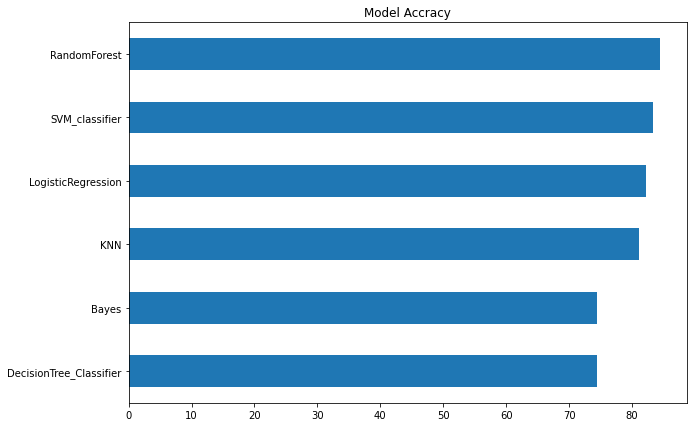

In [35]:
model_accuracy = pd.Series(data=[lr_ac,rdf_ac,dtree_ac,knn_ac,sv_ac,bayes_ac], 
                index=['LogisticRegression','RandomForest','DecisionTree_Classifier','KNN','SVM_classifier','Bayes'])
fig= plt.figure(figsize=(10,7))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

Our models work fine but best of them are Random Forest with 84.44% of accuracy. So we Select Random Forest Algorithm in our model and do hyperparameter tuning on that and Let's look their confusion matrixes.

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
n_estimators = [250,500,750,1000]
criterion = ['gini','entropy']
max_features = ['auto','sqrt','log2']
random_state = [5]

RF = RandomForestClassifier()

parameters = {'n_estimators': [250,500,750,1000],'criterion': ['gini','entropy'],'max_features':['auto','sqrt','log2']}

RFClassifier = GridSearchCV(RF, parameters, scoring='neg_mean_squared_error' ,cv =5)
RFClassifier.fit(X_train,y_train)
RFClassifier.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 500}

In [38]:
RF = RandomForestClassifier(n_estimators=250, max_features='auto', criterion='gini')

In [39]:
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

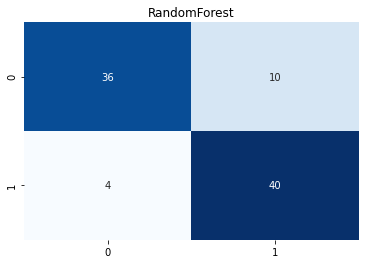

In [40]:
from sklearn.metrics import confusion_matrix
rdf_cm=confusion_matrix(y_test,y_pred)
plt.title("RandomForest")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [41]:
# Classiﬁcation Report
from sklearn.metrics import classification_report 
report = classification_report(y_test, y_pred) 
print(report)

              precision    recall  f1-score   support

           0       0.90      0.78      0.84        46
           1       0.80      0.91      0.85        44

    accuracy                           0.84        90
   macro avg       0.85      0.85      0.84        90
weighted avg       0.85      0.84      0.84        90



In [42]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8458498023715415

Text(0.5, 0, 'False Positive Rate')

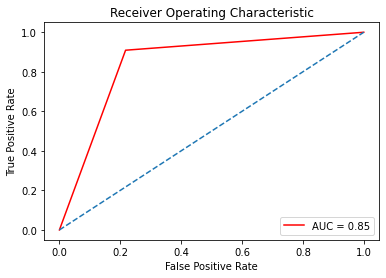

In [43]:
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [44]:
import joblib
joblib.dump(RF, 'Heart_pkl')

['Heart_pkl']